In [9]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
data1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                       delimiter=';')
print(data1)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [11]:
features = data1.iloc[:, :-1].to_numpy()
qualities = data1.iloc[:, -1].to_numpy()

In [12]:
new_class = np.unique(qualities)
print(new_class)

[3 4 5 6 7 8 9]


In [13]:
covc = {}
meanc = {}
priorc = {}
lambda_var = 1/data1.shape[1]
print(lambda_var)
for c in new_class:
    X_c = features[qualities == c]
    meanc[c] = np.mean(X_c, axis=0)
    covc[c] = np.cov(X_c, rowvar=False)
    covc[c] += lambda_var * np.eye(covc[c].shape[0])
    priorc[c] = len(X_c) / len(features)

#print(covc)
#cov = cov

0.08333333333333333


In [20]:
print(meanc)

{3: array([7.60000e+00, 3.33250e-01, 3.36000e-01, 6.39250e+00, 5.43000e-02,
       5.33250e+01, 1.70600e+02, 9.94884e-01, 3.18750e+00, 4.74500e-01,
       1.03450e+01]), 4: array([7.12944785e+00, 3.81226994e-01, 3.04233129e-01, 4.62822086e+00,
       5.00981595e-02, 2.33588957e+01, 1.25279141e+02, 9.94276687e-01,
       3.18288344e+00, 4.76134969e-01, 1.01524540e+01]), 5: array([6.93397392e+00, 3.02010981e-01, 3.37652711e-01, 7.33496911e+00,
       5.15463281e-02, 3.64320522e+01, 1.50904598e+02, 9.95262570e-01,
       3.16883322e+00, 4.82203157e-01, 9.80884008e+00]), 6: array([6.83767061e+00, 2.60564149e-01, 3.38025478e-01, 6.44160601e+00,
       4.52174704e-02, 3.56505914e+01, 1.37047316e+02, 9.93961349e-01,
       3.18859873e+00, 4.91105551e-01, 1.05753715e+01]), 7: array([6.73471591e+00, 2.62767045e-01, 3.25625000e-01, 5.18647727e+00,
       3.81909091e-02, 3.41255682e+01, 1.25114773e+02, 9.92452398e-01,
       3.21389773e+00, 5.03102273e-01, 1.13679356e+01]), 8: array([6.65714286e+

In [22]:
print(priorc)

{3: 0.004083299305839118, 4: 0.03327888934258881, 5: 0.2974683544303797, 6: 0.44875459371171905, 7: 0.17966516945692118, 8: 0.03572886892609228, 9: 0.0010208248264597796}


In [14]:
def classify(x):
    posteriors = []
    for c in new_class:
        mean = meanc[c]
        cov = covc[c]
        prior = priorc[c]
        likelihood = multivariate_normal.pdf(x, mean=mean, cov=cov)
        posterior = likelihood * prior
        posteriors.append(posterior)
    return new_class[np.argmax(posteriors)]

y_pred = np.array([classify(x) for x in features])
error_prob = np.mean(y_pred != qualities)
print(f'Error Probability: {error_prob}')

Error Probability: 0.47060024499795833


In [15]:
conf_matrix = confusion_matrix(qualities, y_pred)
#print(conf_matrix)

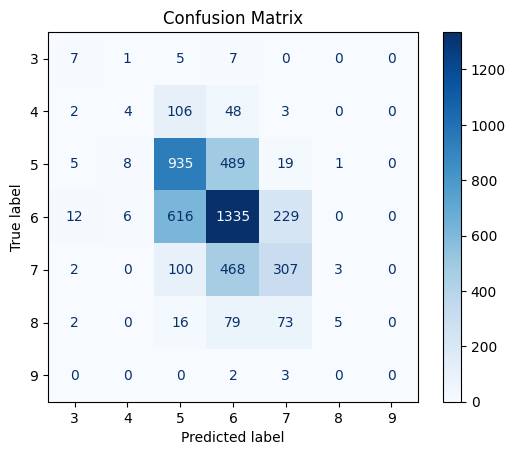

In [16]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(qualities, y_pred, display_labels=new_class, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

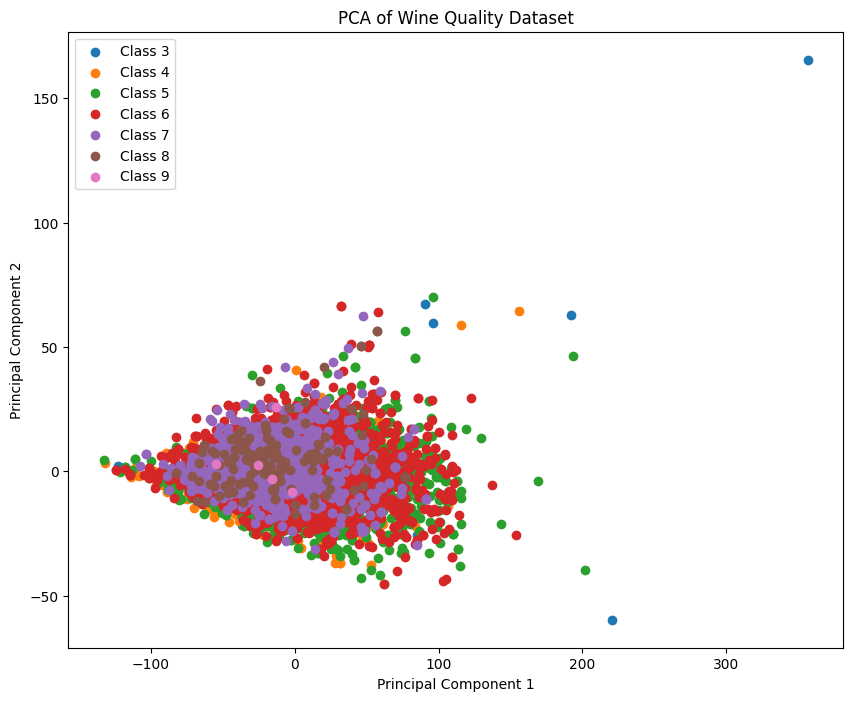

In [17]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

plt.figure(figsize=(10, 8))
for c in new_class:
    plt.scatter(X_pca[qualities == c, 0], X_pca[qualities == c, 1], label=f'Class {c}')
plt.legend()
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

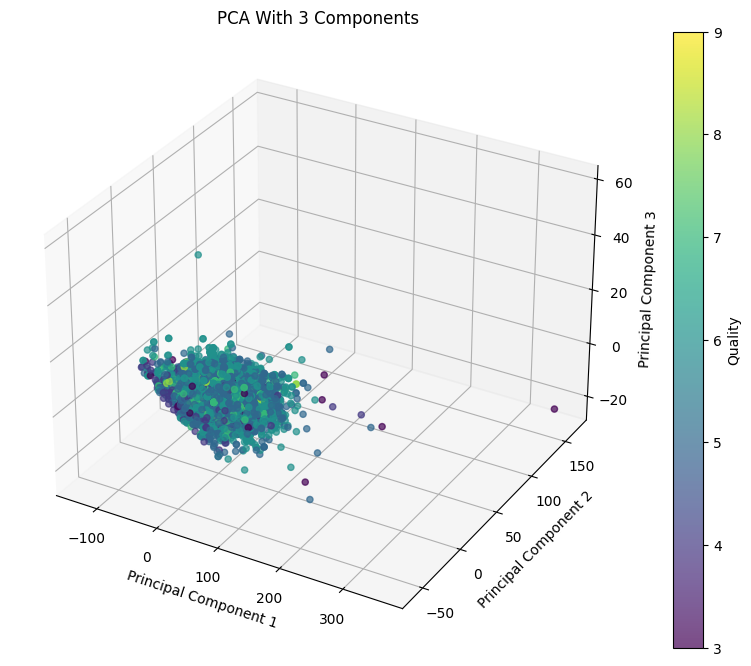

In [18]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(features)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=qualities, cmap='viridis', alpha=0.7)
ax.set_title('PCA With 3 Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scat, ax=ax, label='Quality')
plt.show()

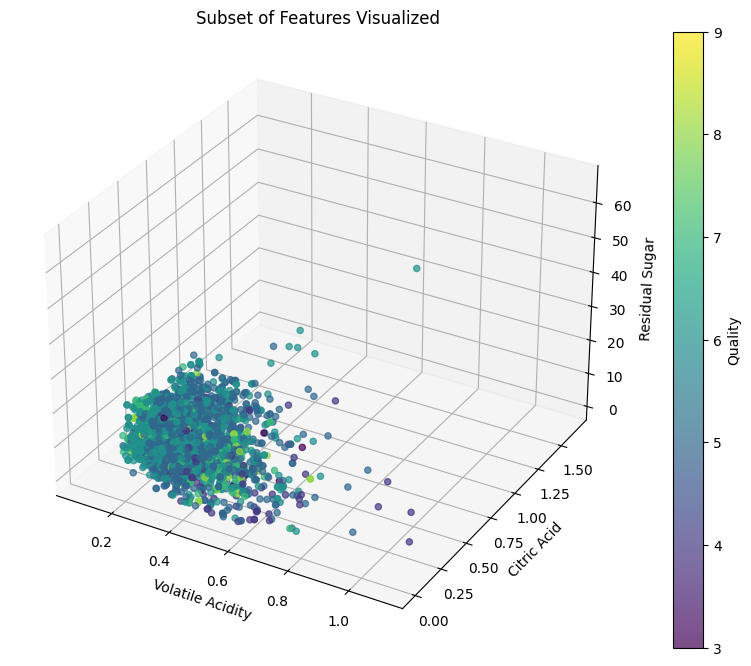

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(data1.iloc[:, 1].to_numpy(), data1.iloc[:, 2].to_numpy(), data1.iloc[:, 3].to_numpy(), c=qualities, cmap='viridis', alpha=0.7)
ax.set_title('Subset of Features Visualized')
ax.set_xlabel('Volatile Acidity')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('Residual Sugar')
fig.colorbar(scat, ax=ax, label='Quality')
plt.show()